In [163]:
# original: https://machinelearningmastery.com/implement-logistic-regression-stochastic-gradient-descent-scratch-python/
import random
import numpy as np
from csv import reader
from math import exp
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [257]:
def get_logistic_probs(w, x):
    exp_terms = np.exp(np.dot(w, x))    
    return exp_terms / sum(exp_terms)

def get_log_loss(y, p):
    return -np.dot(y, np.log(p))

def get_log_loss_gradient(x, y, p):
    return -np.outer(y - p, x)

# Estimate logistic regression coefficients using stochastic gradient descent
def log_coefficients_sgd(train_x, train_y, l_rate, n_epoch, n_classes):
    
    n_examples = len(train_y)
    x_dim = len(train_x[0])
    w = np.zeros((n_classes, x_dim))
    logistic_loss = np.zeros(n_epoch)
    
    for epoch in range(n_epoch):
        
        shuffle = np.random.permutation(n_examples)
        train_x = train_x[shuffle]
        train_y = train_y[shuffle]
        
        for i in range(n_examples):
            x = train_x[i,:]
            y = np.zeros(n_classes)
            y[train_y[i]] = 1
            
            p = get_logistic_probs(w, x)                   # calculate one-vs.-all probabilities 
            logistic_loss[epoch] += get_log_loss(y, p)     # logistic loss 
            loss_gradient = get_log_loss_gradient(x, y, p) # gradient of loss 
            
            w -= l_rate * loss_gradient
    return w, logistic_loss/n_examples

# Linear Regression Algorithm With Stochastic Gradient Descent
def logistic_regression(train_x, train_y, test_x, l_rate, n_epoch):    
    n_classes = len(np.unique(train_y))
    coef, loss = log_coefficients_sgd(train_x, train_y, l_rate, n_epoch, n_classes)

    train_predictions = list()
    test_predictions = list()
    for x in train_x:
        probs = get_logistic_probs(coef, x)
        prediction = np.argmax(probs)
        train_predictions.append(prediction)
    for x in test_x:
        probs = get_logistic_probs(coef, x)
        prediction = np.argmax(probs)
        test_predictions.append(prediction)
    return train_predictions, test_predictions, loss

In [258]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    return sum(actual == predicted) / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(x, y, algorithm, n_folds, *args):
    fold_size = int(len(dataset) / n_folds)
    train_accuracy = list()
    test_accuracy = list()
    losses = list()
    for i in range(n_folds):
        idx = random.sample(range(len(y)), fold_size)
        train_x = x[idx]
        train_y = y[idx]
        test_x = np.delete(x, idx, axis=0)
        test_y = np.delete(y, idx, axis=0)

        train_predictions, test_predictions, loss = algorithm(train_x, train_y, test_x, *args)  
        train_accuracy.append(accuracy_metric(train_y, train_predictions))     
        test_accuracy.append(accuracy_metric(test_y, test_predictions))
        losses.append(loss)
    return train_accuracy, test_accuracy, losses

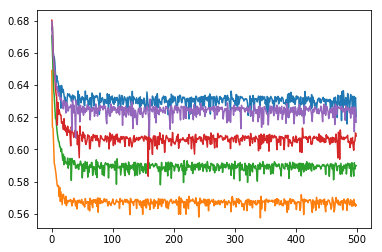

Mean Training Accuracy: 68.105%
Mean Testing Accuracy: 65.886%
Baseline accuracy: 77.214%


In [278]:
# DIABETES DATASET, BINARY

# load and prepare data
filename = 'pima-indians-diabetes.csv'
dataset = np.genfromtxt(filename, delimiter=',')
np.array(dataset).astype(float)
split = np.split(dataset, [-1], axis=1)
x = np.insert(split[0], 0, 1, axis=1)
y = np.ndarray.flatten(split[1]).astype(int)

# normalize
x = MinMaxScaler().fit_transform(x)

# evaluate algorithm
n_folds = 5
l_rate = 0.05
n_epoch = 500
training_accuracy, testing_accuracy, loss = evaluate_algorithm(x, y, logistic_regression, n_folds, l_rate, n_epoch)
for i in range(n_folds):
    plt.plot(loss[i])
plt.ylabel("Logistic Loss / Number of Examples")
plt.xlabel("Epoch Number")
plt.show()

lr = LogisticRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

print('Mean Training Accuracy: %.3f%%' % np.mean(training_accuracy))
print('Mean Testing Accuracy: %.3f%%' % np.mean(testing_accuracy))
print("Baseline accuracy: %.3f%%" % accuracy_metric(y, y_pred))

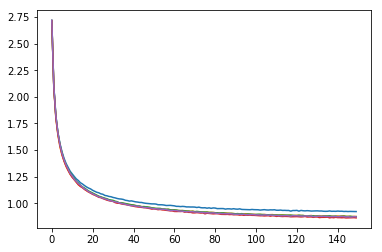

Mean Training Accuracy: 76.220%
Mean Testing Accuracy: 73.523%
Baseline accuracy: 71.505%


In [279]:
# LETTER RECOGNITION, MULTICLASS

# load and prepare data
filename = 'letter-recognition.csv'
dataset = np.genfromtxt(filename, delimiter=',', dtype='<U3')

split = np.split(dataset, [1], axis=1)
x = np.insert(split[1], 0, 1, axis=1).astype('float')
x = MinMaxScaler().fit_transform(x)

convert_to_num = np.vectorize(ord)
y = convert_to_num(np.ndarray.flatten(split[0])) - ord('A')
if min(y) != 0:
    y -= min(y)
    
# evaluate algorithm
n_folds = 5
l_rate = 0.1
n_epoch = 150
training_accuracy, testing_accuracy, loss = evaluate_algorithm(x, y, logistic_regression, n_folds, l_rate, n_epoch)
for i in range(n_folds):
    plt.plot(loss[i])
plt.ylabel("Logistic Loss / Number of Examples")
plt.xlabel("Epoch Number")
plt.show()

lr = LogisticRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

print('Mean Training Accuracy: %.3f%%' % np.mean(training_accuracy))
print('Mean Testing Accuracy: %.3f%%' % np.mean(testing_accuracy))
print("Baseline accuracy: %.3f%%" % accuracy_metric(y, y_pred))